In [1]:
import sys
import os

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
from typing import List
import matplotlib.pyplot as plt
import math
sys.path.insert(1, '../utils')
from utils import *
from utils import plot_solution
from utils import score
# from numba import njit

In [13]:
a=pd.read_csv('../data/TSPA.csv', sep=';', header=None)
tspa=pd.DataFrame(data=a.values, columns=['x', 'y', 'val'])

coordinates=tspa[['x', 'y']].values

dist=distance_matrix(coordinates, coordinates)
dist=np.round(dist)

costs=tspa[['val']].values

In [33]:
def greedy_2_regret_cycle(starting_point: int, distance_matrix: np.ndarray, costs: np.ndarray) -> list:
    cost_matrix = (distance_matrix + costs).T
    n = len(distance_matrix)
    num_nodes_to_use = n // 2

    cycle = [starting_point]
    unvisited = list(range(n))
    unvisited.remove(starting_point)
    best_insertion = None
    min_increase = float('inf')
    nearest = min(unvisited, key=lambda i: cost_matrix[starting_point][i])
    cycle.append(nearest)
    unvisited.remove(nearest)
  
    for i in unvisited:
            increase = (
                    cost_matrix[cycle[0]][i] +
                    cost_matrix[i][cycle[1]] 
    
                )
            if increase < min_increase:
                    min_increase = increase
                    best_insertion = (i, 0)

    i, j = best_insertion
    cycle.insert(j+2, i)
    unvisited.remove(i)
    while len(cycle) < num_nodes_to_use:
        best_insertion = None
        max_regret = float('-inf')

        for i in unvisited:
            best_increase = float('inf')
            second_best_increase = float('inf')
            best_position = None
            
            for j in range(len(cycle)):
                k = (j + 1) % len(cycle)
                increase = (
                    cost_matrix[cycle[j]][i] + 
                    cost_matrix[i][cycle[k]] - 
                    cost_matrix[cycle[j]][cycle[k]]
                )
                if increase < best_increase:
                    second_best_increase = best_increase
                    best_increase = increase
                    best_position = k
                elif increase < second_best_increase:
                    second_best_increase = increase
            regret = second_best_increase - best_increase
            if regret > max_regret:
                max_regret = regret
                best_insertion = (i, best_position)
        i, best_position = best_insertion
        cycle.insert(best_position, i)
        unvisited.remove(i)

    return cycle

In [46]:
def greedy_2_regret_cycle2(starting_point: int, distance_matrix: np.ndarray, costs: np.ndarray) -> list:
    cost_matrix = (distance_matrix + costs).T 
    n = len(distance_matrix)
    num_nodes_to_use = n // 2


    cycle = np.array([starting_point])  
    unvisited = np.ones(n, dtype=bool) 
    unvisited[starting_point] = False

 
    unvisited_indices = np.where(unvisited)[0]  
    nearest = unvisited_indices[np.argmin(cost_matrix[starting_point, unvisited_indices])] 
    cycle = np.append(cycle, nearest) 
    unvisited[nearest] = False  
    unvisited_indices = np.where(unvisited)[0]
    increases = (
        cost_matrix[cycle[0], unvisited_indices[:, None]] +  
        cost_matrix[unvisited_indices[:, None], cycle[1]]    
    )
    min_idx = np.argmin(increases)
    best_insertion = (unvisited_indices[min_idx], 0)  
    i, j = best_insertion
    cycle = np.insert(cycle, j + 2, i)  
    unvisited[i] = False  
    while len(cycle) < num_nodes_to_use:
        cycle_len = len(cycle)
        unvisited_indices = np.where(unvisited)[0]
        j_indices = np.arange(cycle_len)
        k_indices = (j_indices + 1) % cycle_len  
        cost_increases = (
            cost_matrix[cycle[j_indices], unvisited_indices[:, None]] +  
            cost_matrix[unvisited_indices[:, None], cycle[k_indices]] - 
            cost_matrix[cycle[j_indices], cycle[k_indices]]
        )
        best_increases = np.min(cost_increases, axis=1)  
        second_best_increases = np.partition(cost_increases, 1, axis=1)[:, 1] 
        regrets = second_best_increases - best_increases
        max_regret_idx = np.argmax(regrets)
        i = unvisited_indices[max_regret_idx]
        best_position = np.argmin(cost_increases[max_regret_idx])
        cycle = np.insert(cycle, (best_position + 1) % cycle_len, i) 
        unvisited[i] = False  
    return cycle.tolist()

In [18]:
scores_2=[]
sols_2=[]

for x in range(200):
   
    solution_2=greedy_2_regret_cycle(x, dist, costs)
    sols_2.append(solution_2)

    scores_2.append(score(solution_2, dist, costs))   

print('scores of nn: ', min(scores_2), sum(scores_2)/len(scores_2), max(scores_2))
print(sols_2[scores_2.index(min(scores_2))])


scores of nn:  105852 115630.16 123171
[159, 195, 146, 22, 20, 18, 108, 67, 36, 140, 93, 117, 170, 153, 183, 89, 23, 83, 64, 15, 9, 37, 128, 172, 57, 55, 3, 32, 49, 102, 144, 132, 21, 7, 164, 71, 27, 39, 165, 8, 185, 174, 81, 98, 17, 157, 188, 56, 171, 16, 78, 25, 44, 120, 2, 75, 86, 97, 189, 94, 130, 137, 66, 176, 80, 151, 133, 79, 63, 136, 53, 180, 154, 6, 135, 194, 161, 123, 29, 126, 112, 4, 190, 177, 147, 48, 34, 160, 184, 28, 43, 65, 197, 59, 118, 60, 46, 198, 139, 193]


In [47]:
scores_2=[]
sols_2=[]

for x in range(200):
   
    solution_2=greedy_2_regret_cycle2(x, dist, costs)
    sols_2.append(solution_2)

    scores_2.append(score(solution_2, dist, costs))   

print('scores of nn: ', min(scores_2), sum(scores_2)/len(scores_2), max(scores_2))
print(sols_2[scores_2.index(min(scores_2))])


scores of nn:  105852 115630.16 123171
[159, 195, 146, 22, 20, 18, 108, 67, 36, 140, 93, 117, 170, 153, 183, 89, 23, 83, 64, 15, 9, 37, 128, 172, 57, 55, 3, 32, 49, 102, 144, 132, 21, 7, 164, 71, 27, 39, 165, 8, 185, 174, 81, 98, 17, 157, 188, 56, 171, 16, 78, 25, 44, 120, 2, 75, 86, 97, 189, 94, 130, 137, 66, 176, 80, 151, 133, 79, 63, 136, 53, 180, 154, 6, 135, 194, 161, 123, 29, 126, 112, 4, 190, 177, 147, 48, 34, 160, 184, 28, 43, 65, 197, 59, 118, 60, 46, 198, 139, 193]


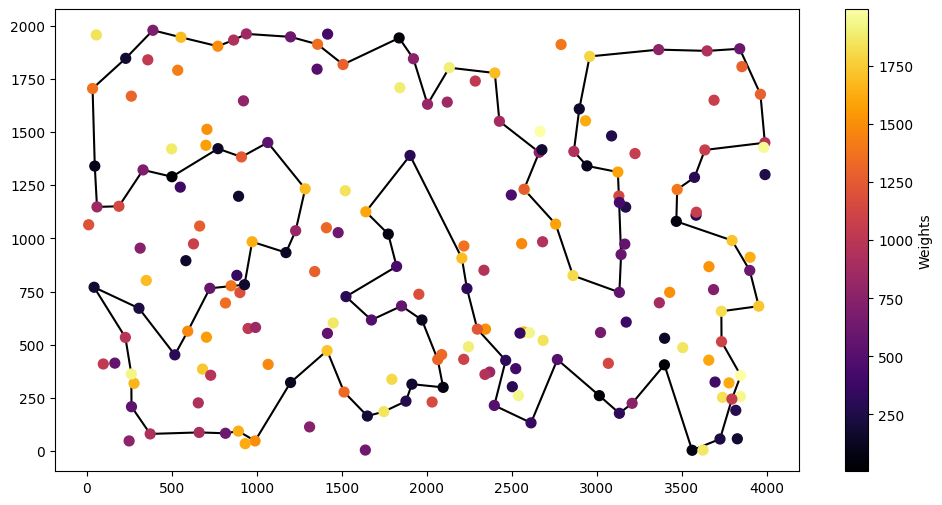

In [25]:
plot_solution(sols_2[scores_2.index(min(scores_2))], coordinates, costs, '')

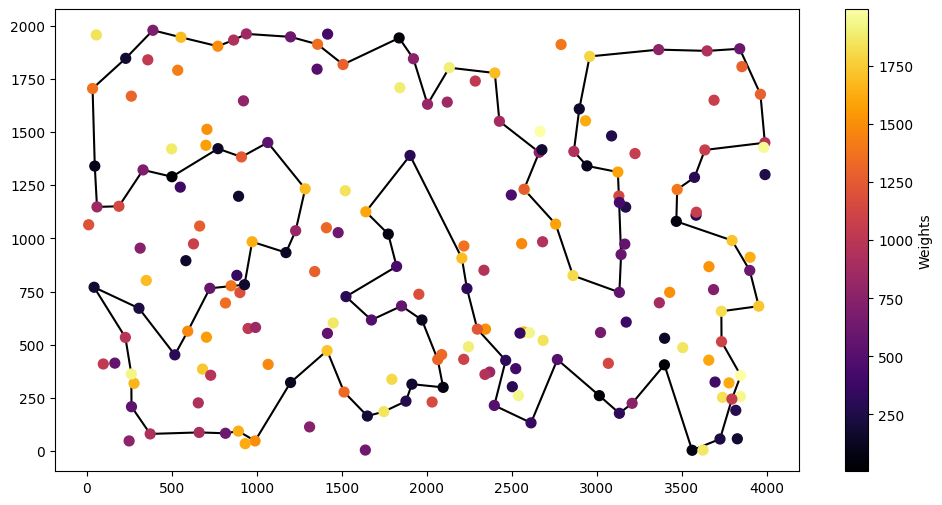

In [48]:
plot_solution(sols_2[scores_2.index(min(scores_2))], coordinates, costs, '')

29


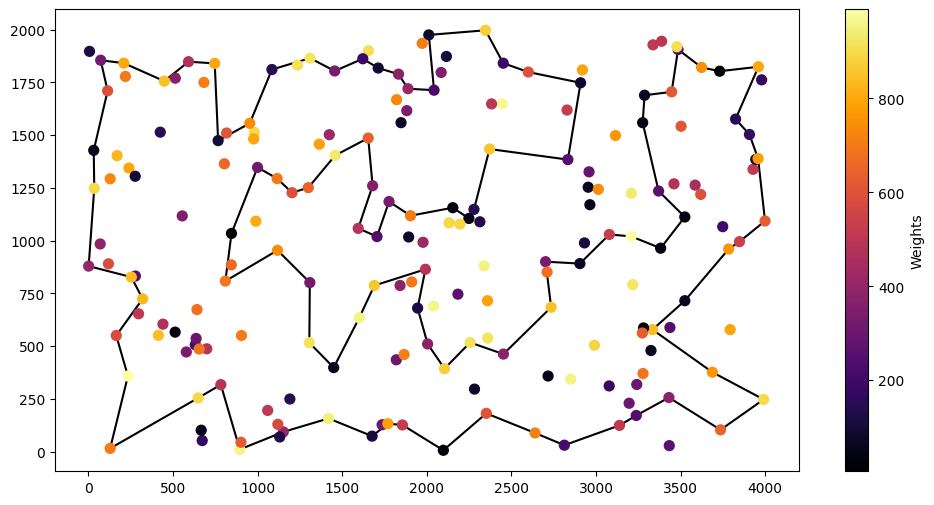

In [12]:
s=greedy_2_regret_cycle(0, dist, costs)
plot_solution(s, coordinates, costs,'')

In [34]:
%%timeit
greedy_2_regret_cycle(0, dist, costs)

562 ms ± 5.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%%timeit
greedy_2_regret_cycle2(0, dist, costs)

12.4 ms ± 302 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
s

[117,
 0,
 60,
 141,
 66,
 51,
 151,
 72,
 59,
 197,
 105,
 43,
 5,
 41,
 115,
 46,
 110,
 93,
 36,
 67,
 108,
 69,
 18,
 20,
 22,
 146,
 103,
 34,
 160,
 48,
 54,
 177,
 184,
 11,
 84,
 4,
 112,
 156,
 24,
 123,
 127,
 194,
 135,
 6,
 154,
 158,
 53,
 136,
 121,
 100,
 97,
 87,
 124,
 111,
 33,
 128,
 172,
 55,
 57,
 92,
 129,
 82,
 120,
 44,
 25,
 78,
 16,
 171,
 113,
 50,
 188,
 157,
 17,
 98,
 81,
 174,
 119,
 8,
 39,
 90,
 27,
 71,
 164,
 7,
 21,
 138,
 178,
 49,
 102,
 144,
 132,
 73,
 64,
 114,
 83,
 23,
 76,
 89,
 183,
 143]